<a href="https://colab.research.google.com/github/carlos-castellanos99/Data-Science-Program-TEC/blob/main/Solucion_Reto_SC_63_CarlosCastellanos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
#Importamos las librerías necesarias
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

In [43]:
#Cargamos los archivos para trabajar con ellos
from google.colab import files
uploaded = files.upload()

Saving bank_marketing_RETO_DS_AS.csv to bank_marketing_RETO_DS_AS (2).csv


In [44]:
#Leemos el archivo CSV
data =  pd.read_csv('/content/bank_marketing_RETO_DS_AS.csv')

In [45]:
#Obtenemos la información de la base de datos para revisar el número de registros, el total de variables, el tipo de cada variable y la cantidad de datos perdidos de cada variable en caso de que existan.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        9000 non-null   int64 
 1   job        9000 non-null   object
 2   marital    9000 non-null   object
 3   education  9000 non-null   object
 4   default    9000 non-null   object
 5   balance    9000 non-null   int64 
 6   housing    9000 non-null   object
 7   loan       9000 non-null   object
 8   contact    9000 non-null   object
 9   day        9000 non-null   int64 
 10  month      9000 non-null   object
 11  duration   9000 non-null   int64 
 12  campaign   9000 non-null   int64 
 13  pdays      9000 non-null   int64 
 14  previous   9000 non-null   int64 
 15  poutcome   9000 non-null   object
 16  y          9000 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.2+ MB


In [46]:
#Con la información del archivo  bank-names-RETO_DS_AS.txt, enlistamos las variables categóricas y numéricas
num_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

In [47]:
#Revisamos algunas de las variables categoricas de la base de datos para decidir si utilizar la transformación LabelEncoder o OneHotEncoder
data['job'].value_counts()

management       1999
blue-collar      1688
technician       1485
admin.           1004
services          771
retired           594
self-employed     319
student           312
unemployed        290
housemaid         246
entrepreneur      241
unknown            51
Name: job, dtype: int64

In [48]:
#Revisamos algunas las variables categoricas de la base de datos para decidir si utilizar la transformación LabelEncoder o OneHotEncoder
data['marital'].value_counts()

married     5124
single      2837
divorced    1039
Name: marital, dtype: int64

La tranformación OneHotEncoder crea una columna por cada uno de los niveles de cada variable categórica. Cuando la variable contiene muchos niveles, este tipo de tranformación no es tan práctico ya que crearía muchas columnas y  aumenta la dimensionalidad de los datos. Por lo tanto, en este caso se opta la tranformación con LabelEncoder ya que nos va a manetner solo una columna y cada categoría va recibir un número entero único

In [49]:
le = LabelEncoder()

data[cat_cols] = data[cat_cols].apply(le.fit_transform);

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,31,6,1,2,0,2666,0,0,0,10,9,318,2,97,6,2,yes
1,29,10,2,3,0,1584,0,0,0,6,11,245,1,-1,0,3,yes
2,41,1,1,1,0,2152,1,0,0,17,9,369,1,-1,0,3,no
3,50,1,1,1,0,84,1,0,0,17,5,18,8,-1,0,3,no
4,40,0,1,1,0,0,0,0,0,28,5,496,2,182,11,2,yes


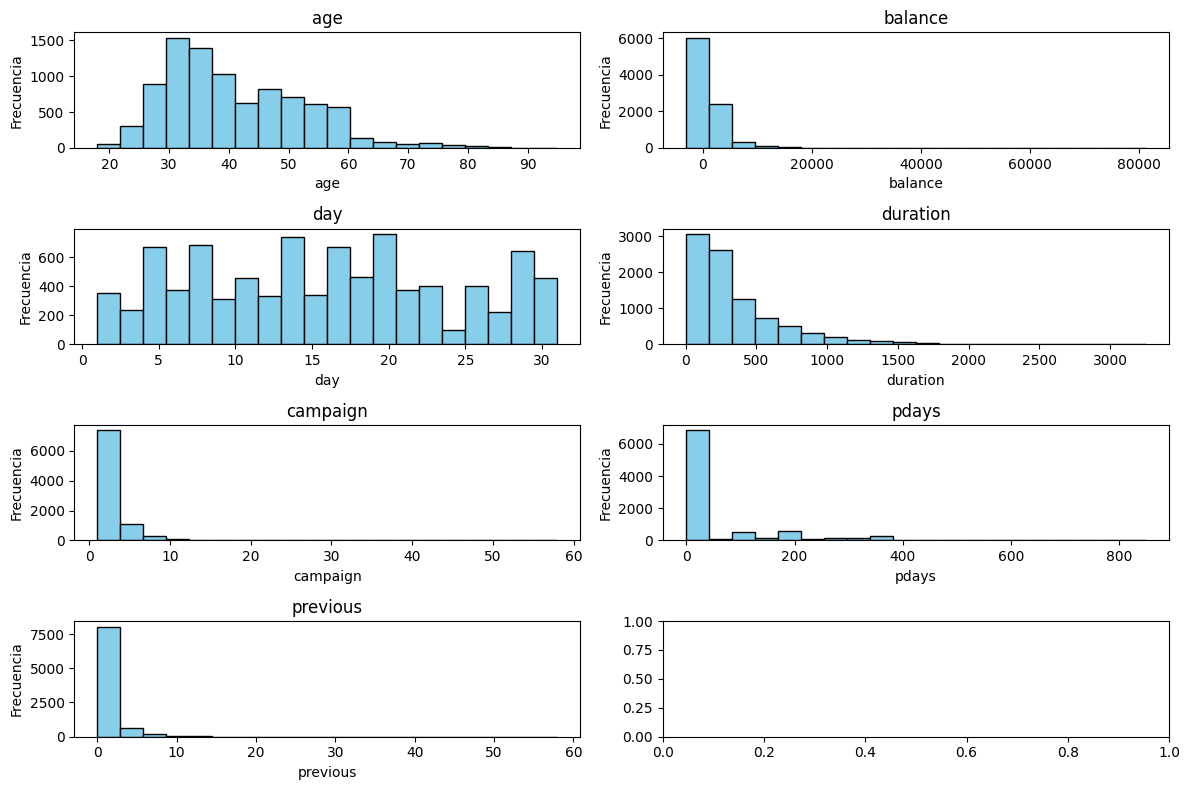

In [50]:
#Graficamos las variables numéricas para revisar si necesitan algún tipo de transformación

df = data[num_cols]

num_columnas_subplot = 2
num_filas_subplot = 4

# Creamos los subplots
fig, axs = plt.subplots(num_filas_subplot, num_columnas_subplot, figsize=(12, 8))

# Iteramos a través de las columnas y crear un histograma para cada una
for i, columna in enumerate(df.columns):
    fila = i // num_columnas_subplot
    columna_subplot = i % num_columnas_subplot

    axs[fila, columna_subplot].hist(df[columna], bins=20, color='skyblue', edgecolor='black')
    axs[fila, columna_subplot].set_title(columna)
    axs[fila, columna_subplot].set_xlabel(columna)
    axs[fila, columna_subplot].set_ylabel('Frecuencia')
# Ajustar automáticamente el espacio entre subplots
plt.tight_layout()

# Mostrar los subplots
plt.show()

Todas la variables númericas, exceptuando day, parciera tener un sesgo positivo. Por lo que procedemos a hacer una tranformación logaritmica.

In [51]:
#Definimos la función
def TransformacionNumerica(X):
  return np.log(X + 1)

In [52]:
num_cols_sin_day = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
TransformacionNumerica(data[num_cols_sin_day]);

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


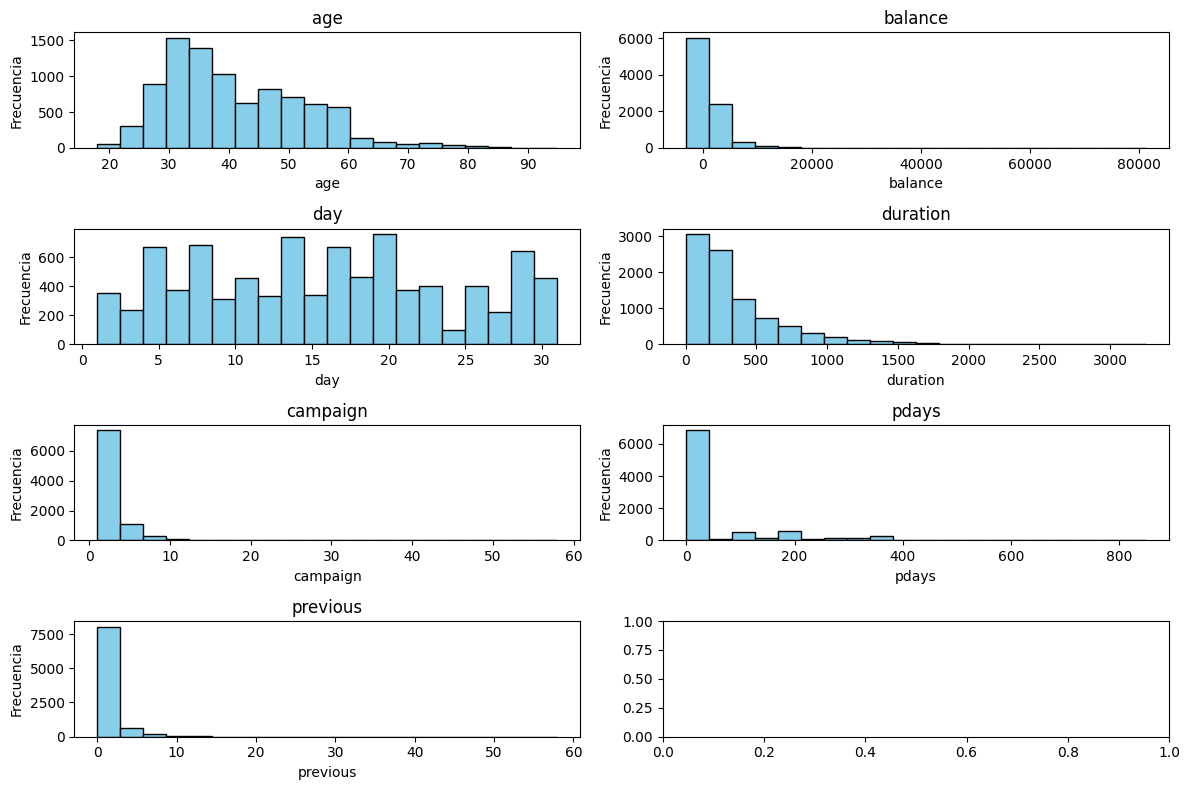

In [53]:
#Graficamos las variables numéricas para revisar si necesitan algún tipo de transformación

df = data[num_cols]

num_columnas_subplot = 2
num_filas_subplot = 4

# Creamos los subplots
fig, axs = plt.subplots(num_filas_subplot, num_columnas_subplot, figsize=(12, 8))

# Iteramos a través de las columnas y crear un histograma para cada una
for i, columna in enumerate(df.columns):
    fila = i // num_columnas_subplot
    columna_subplot = i % num_columnas_subplot

    axs[fila, columna_subplot].hist(df[columna], bins=20, color='skyblue', edgecolor='black')
    axs[fila, columna_subplot].set_title(columna)
    axs[fila, columna_subplot].set_xlabel(columna)
    axs[fila, columna_subplot].set_ylabel('Frecuencia')
# Ajustar automáticamente el espacio entre subplots
plt.tight_layout()

# Mostrar los subplots
plt.show()

In [54]:
#Consideramos la variable “y” como la variable de salida y el resto de las variables como las variables de entrada.
X = data[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome' ]]
Y = data[['y']]

In [55]:
#Tranformamos la variable de salida a números
data[['y']] = data[['y']].apply(le.fit_transform);

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,31,6,1,2,0,2666,0,0,0,10,9,318,2,97,6,2,1
1,29,10,2,3,0,1584,0,0,0,6,11,245,1,-1,0,3,1
2,41,1,1,1,0,2152,1,0,0,17,9,369,1,-1,0,3,0
3,50,1,1,1,0,84,1,0,0,17,5,18,8,-1,0,3,0
4,40,0,1,1,0,0,0,0,0,28,5,496,2,182,11,2,1


In [56]:
 #Revisamos la proporción de datos en cada clase para identificar si están balanceadas o desbalanceadas

print(Y['y'].value_counts())

print('Porcentaje de cliente que solictaron un depósito a plazo: ', 100 *  len(Y[Y['y'] == 1])/ Y.shape[0])
print('Porcentaje de cliente que no solictaron un depósito a plazo: ', 100 * len(Y[Y['y'] == 0]) / Y.shape[0])

no     5213
yes    3787
Name: y, dtype: int64
Porcentaje de cliente que solictaron un depósito a plazo:  0.0
Porcentaje de cliente que no solictaron un depósito a plazo:  0.0


In [57]:
#Definimos una función de escalamiento
def Escalamiento(X):
  return (X - np.min(X)) / (np.max(X) - np.min(X))


In [58]:
#Escalamos las variables de la base de datos antes de ingresarla al modelo
for columna in data.columns:
    data[columna] = Escalamiento(data[columna])

In [59]:
X = X.values
Y = Y.values

In [60]:
#Particionamos los datos en los conjuntos de entrenamiento, validación y prueba en 60%, 20% y 20%, respectivamente
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(X, Y, train_size=.60, random_state=11)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test,y_validation_and_test, test_size=.50, random_state=11)


In [61]:
#Aplicamos el modelo Regresión Logística en el conjunto de entrenamiento. Valida el modelo con las predicciones del conjunto de validación y su matriz de confusión.
modelo_RL_base = LogisticRegression(random_state=5)
print(modelo_RL_base)

LogisticRegression(random_state=5)


In [62]:
modelo_RL_base.fit(x_train, np.ravel(y_train))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=5)

In [63]:
y_train.shape

(5400, 1)

In [64]:
modelo_RL_base.score(x_validation, y_validation)

0.7644444444444445

In [65]:
#Buscamos los mejores parámetros del modelo

In [66]:
parameters = {'C': [0.1, 0.15, 0.18, 0.2, 0.22, 0.24, 0.28, 0.3], 'penalty' : ('l2', 'elasticnet', 'none'), 'solver': ('newton-cg', 'saga', 'lbfgs', 'sag')}

In [67]:
RL_grid = LogisticRegression(max_iter = 10000)

modelo_RL_grid = GridSearchCV(RL_grid, parameters)
modelo_RL_grid.fit(x_train, np.ravel(y_train))

print("Los mejores valores encontrados %s con un score de %0.2f" %(modelo_RL_grid.best_params_,modelo_RL_grid.best_score_))
print(modelo_RL_grid.score(x_validation, y_validation))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

Los mejores valores encontrados {'C': 0.1, 'penalty': 'none', 'solver': 'newton-cg'} con un score de 0.80
0.7961111111111111


In [68]:
#Obtenemos la matriz de confusion

pr = modelo_RL_grid.predict(x_validation)
confusion_matrix(y_validation, pr)


array([[855, 149],
       [218, 578]])

In [69]:
modelo_NN = MLPClassifier(hidden_layer_sizes=(15, 4), max_iter=700)


In [70]:
modelo_NN.fit(x_train, y_train)
print(modelo_NN.score(x_validation, y_validation))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5633333333333334


In [71]:
parametersNN = {'hidden_layer_sizes': [(15,4), (15,8), (15,16), (20,4), (20,8), (20,16), (25,4), (25,8), (25,16), (30,4), (30,8) , (30,16)]}

In [72]:
NN_grid = MLPClassifier(max_iter = 1000)

modelo_NN_grid = GridSearchCV(NN_grid, parametersNN)
modelo_NN_grid.fit(x_train, np.ravel(y_train))

print("Los mejores valores encontrados %s con un score de %0.2f" %(modelo_NN_grid.best_params_,modelo_NN_grid.best_score_))
print(modelo_NN_grid.score(x_validation, y_validation))

Los mejores valores encontrados {'hidden_layer_sizes': (25, 4)} con un score de 0.78
0.7822222222222223


In [73]:
pr2 = modelo_NN_grid.predict(x_validation)
confusion_matrix(y_validation, pr2)

array([[797, 207],
       [185, 611]])

El mejor modelo encontrado es el de Regresión Lineal, ya que su precisión fue de aproximadamente 80%

In [74]:
#Modelo Final
modelo_RL_final = LogisticRegression(C = 0.1, penalty = 'none', solver = 'newton-cg', random_state=5)
modelo_RL_final.fit(x_train, np.ravel(y_train))
modelo_RL_final.score(x_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


0.7683333333333333

¿Qué se puede decir acerca del uso de técnicas de inteligencia artificial en problemas de mercadotecnia?


*   Las técnicas de inteligencia artificial ayudan a predecir, con una alta precisión, si el cliente suscribirá un depósito a plazo
*   Con estes técnicas se podría enfocar los recursos de marketing a los cliente que predecimos que van a aceptar la suscripción.

